<h1 style='text-align: center;'> **A Quick Overview of Belgium's Real Estate Industry** </h1>

<h3 style='text-align: center;'> An Exploratory Data Analysis with Immoweb.be - Project ImmoEliza</h3>

<p style='text-align: center;'>By: Muhammad Anhar Firdausyi - BeCode - Junior</p>

,address,bedroom_count,district,epc_score,habitable_surface,immo_status,immocode,land_surface,municipality,plot_area,postalcode,price,price_per_sqmeter,province,region,room_count,subtype,type
0,Rue de l'Aviation 5,2,62000,D,60.0,FOR_SALE,10707752,123.0,62096,183.0,4100,119000,650,62000,3000,3,HOUSE,HOUSE
1,Rue de La Roche 64,5,83000,G,196.0,FOR_SALE,10707736,899.0,Hampteau,1095.0,6990,224000,205,80000,3000,6,HOUSE,HOUSE
2,Rue des Allies 20,4,83000,C,235.0,FOR_SALE,10707489,122.0,Nassogne,357.0,6950,325000,910,80000,3000,5,APARTMENT_BLOCK,HOUSE
3,Rue de la Sèroule 35,3,62000,B,130.0,FOR_SALE,10707554,730.0,Soumagne,860.0,4630,379000,441,62000,3000,4,HOUSE,HOUSE
4,Weldadigheidstraat 2,4,44000,E,194.0,FOR_SALE,10707453,975.0,Lievegem,1169.0,9930,495000,423,40000,2000,5,HOUSE,HOUSE


(16170, 18)

["Column 'habitable_surface' has missing values.", "Column 'land_surface' has missing values.", "Column 'plot_area' has missing values."]
[]
There are 0 duplicated item in main_df['immocode'] . So there is no literal duplicates in main_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16170 entries, 0 to 16169
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   address            16170 non-null  object 
 1   bedroom_count      16170 non-null  int32  
 2   district           16170 non-null  int64  
 3   epc_score          16170 non-null  object 
 4   habitable_surface  16170 non-null  float64
 5   immo_status        16170 non-null  object 
 6   immocode           16170 non-null  int32  
 7   land_surface       16170 non-null  float64
 8   municipality       16170 non-null  object 
 9   plot_area          16170 non-null  float64
 10  postalcode         16170 non-null  int64  
 11  price              1617

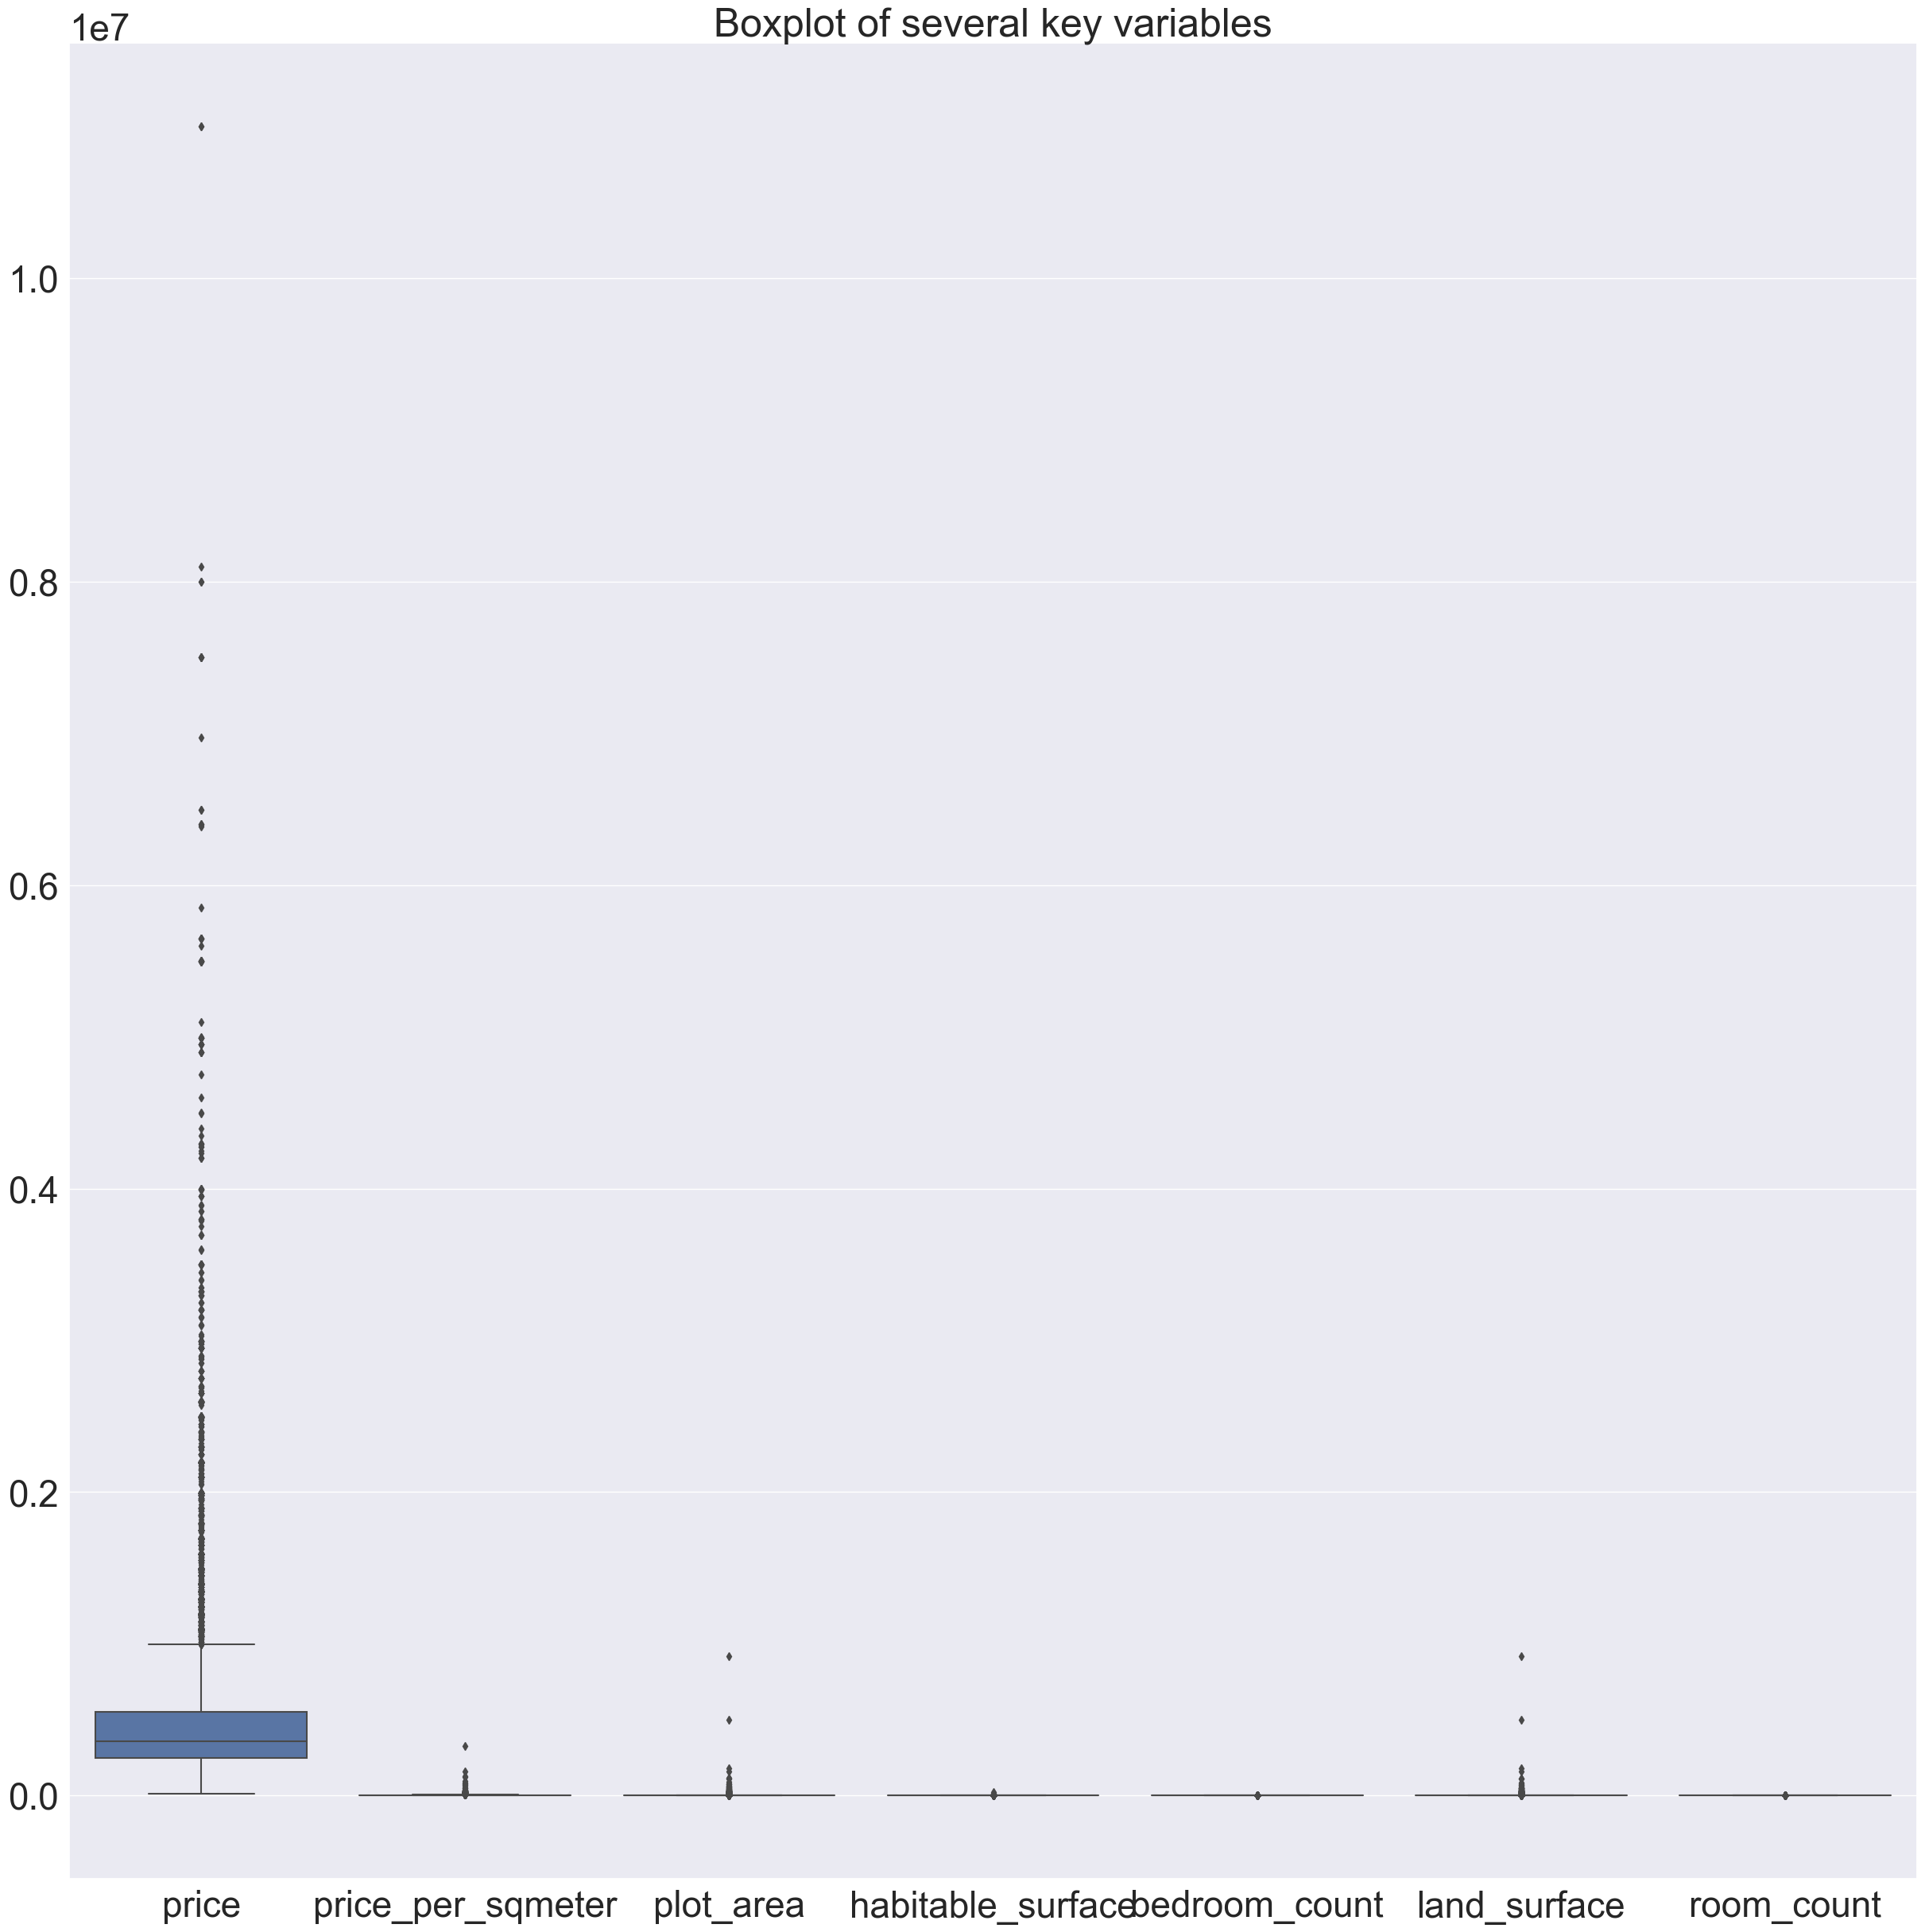

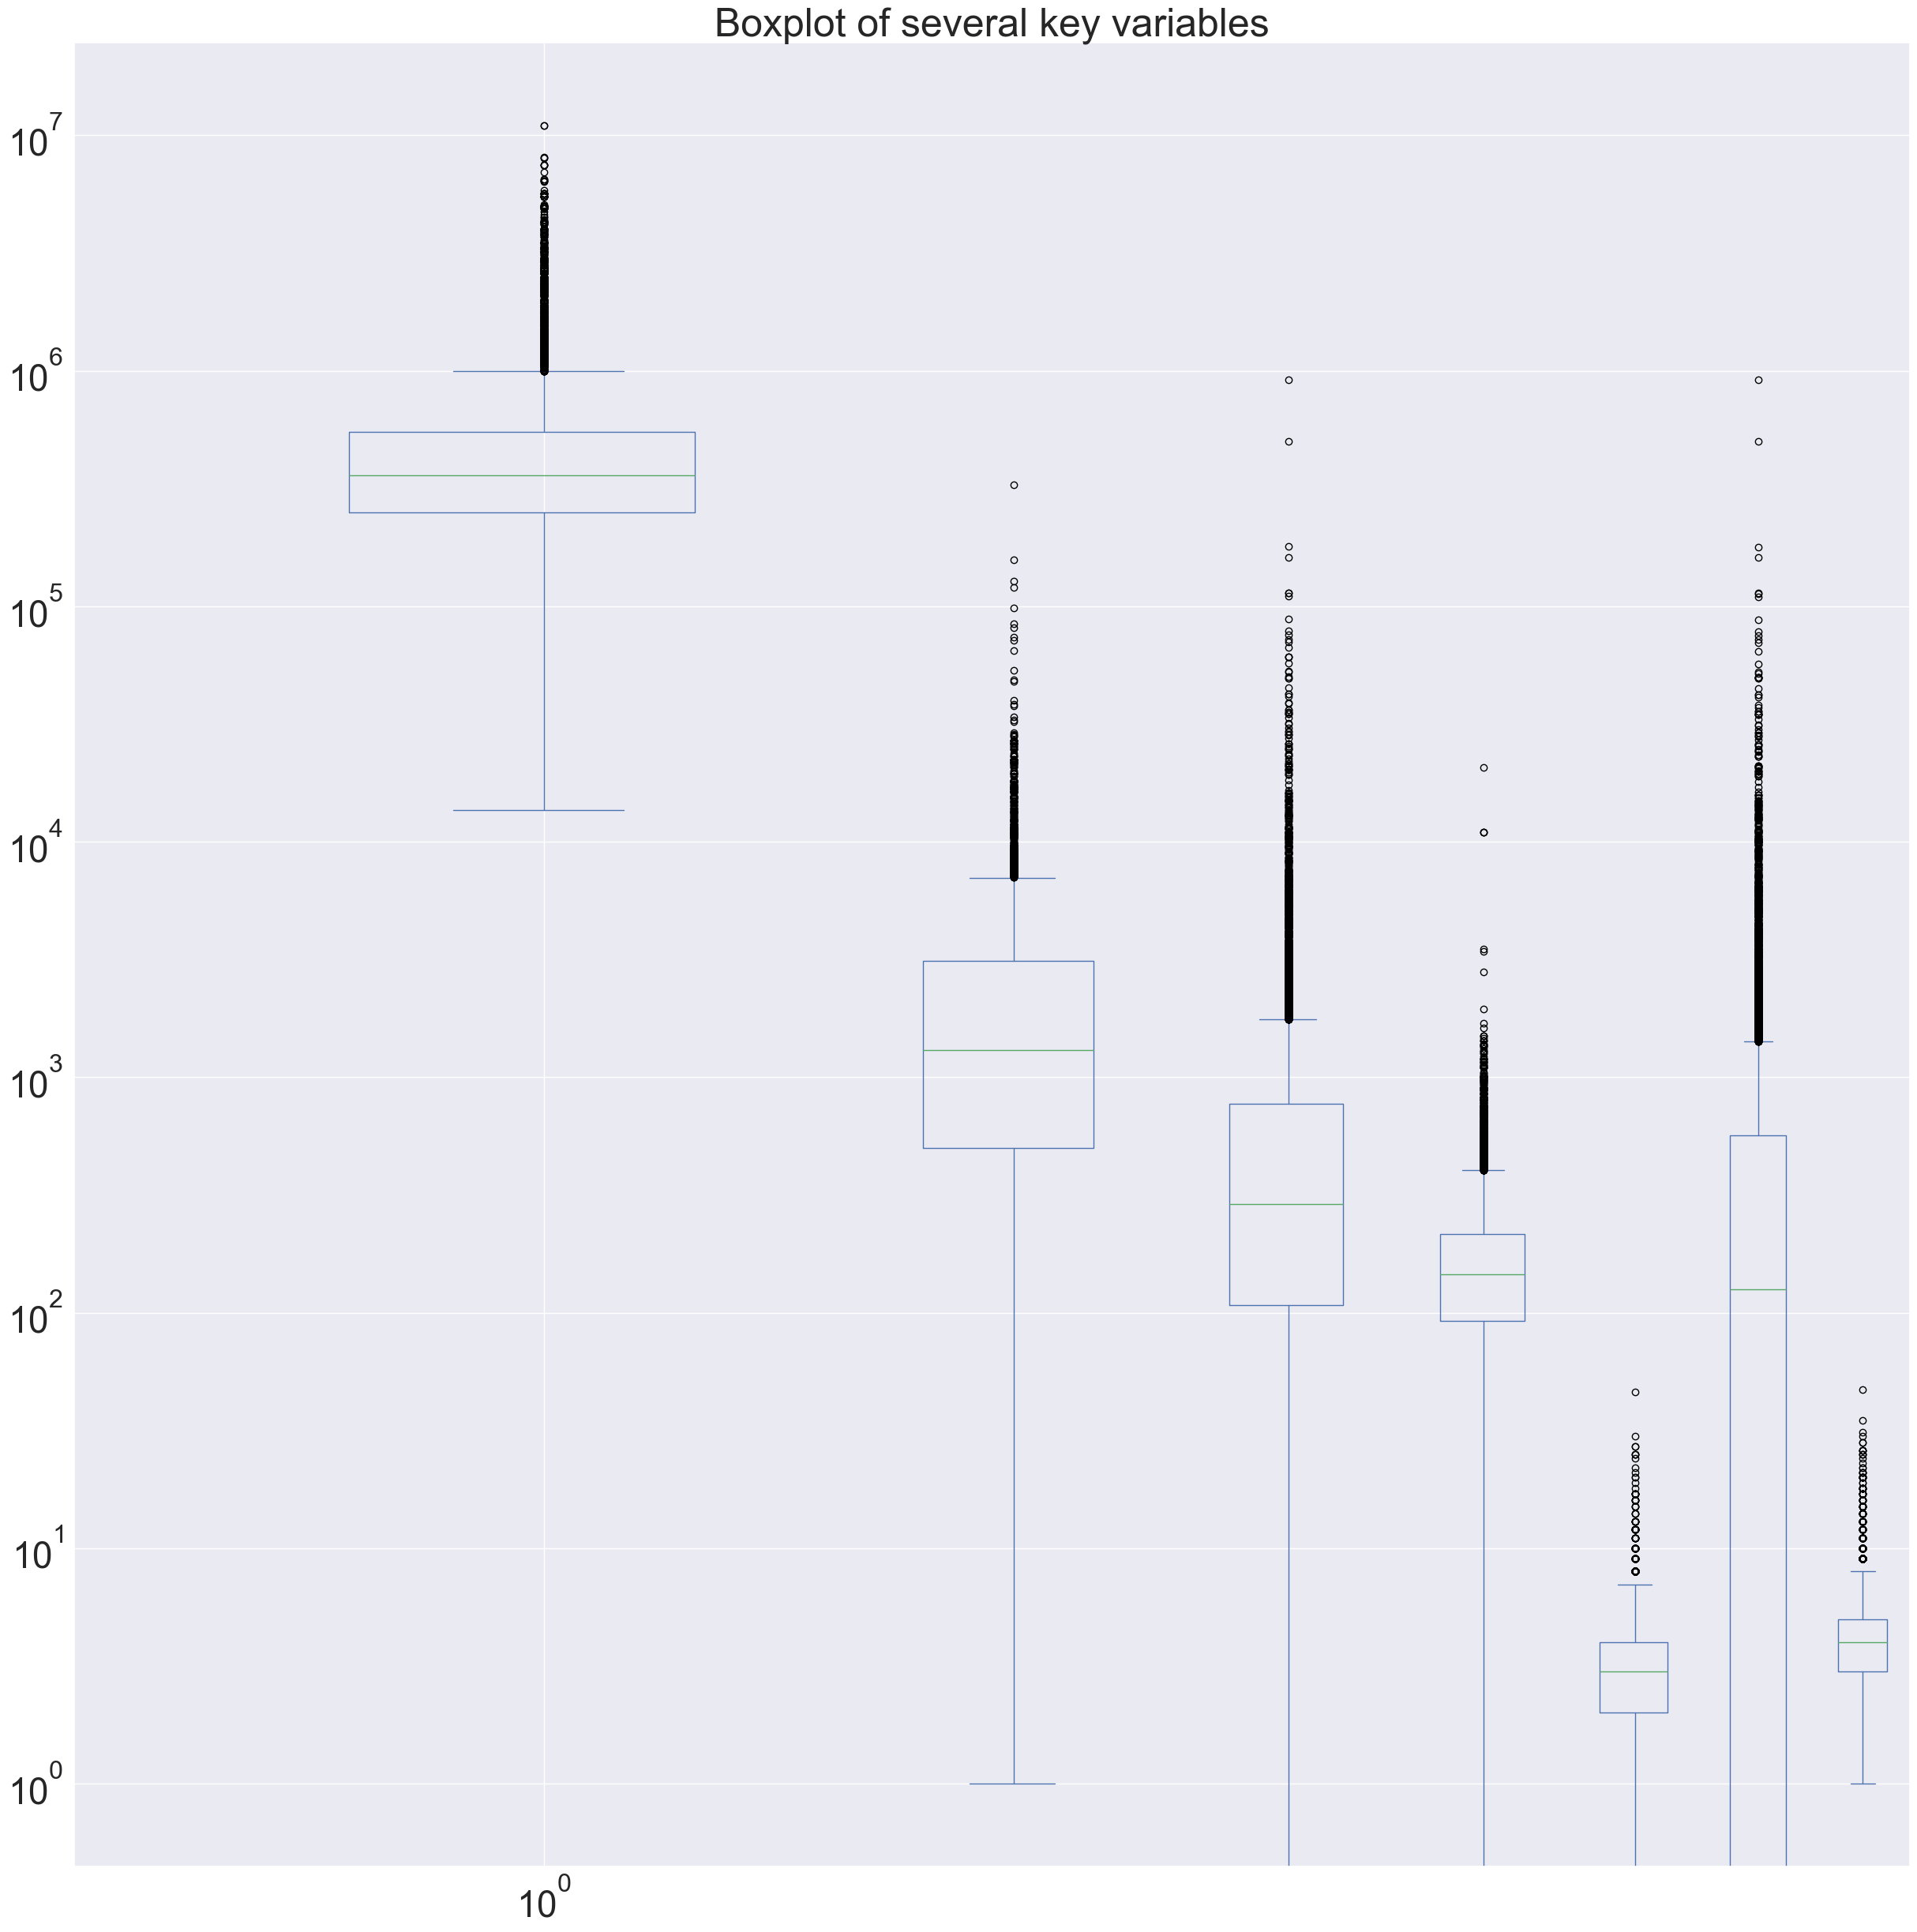

Text(0.5, 1.0, 'Correlation Matrix of df_price_continuous, using Pearson Correlation')

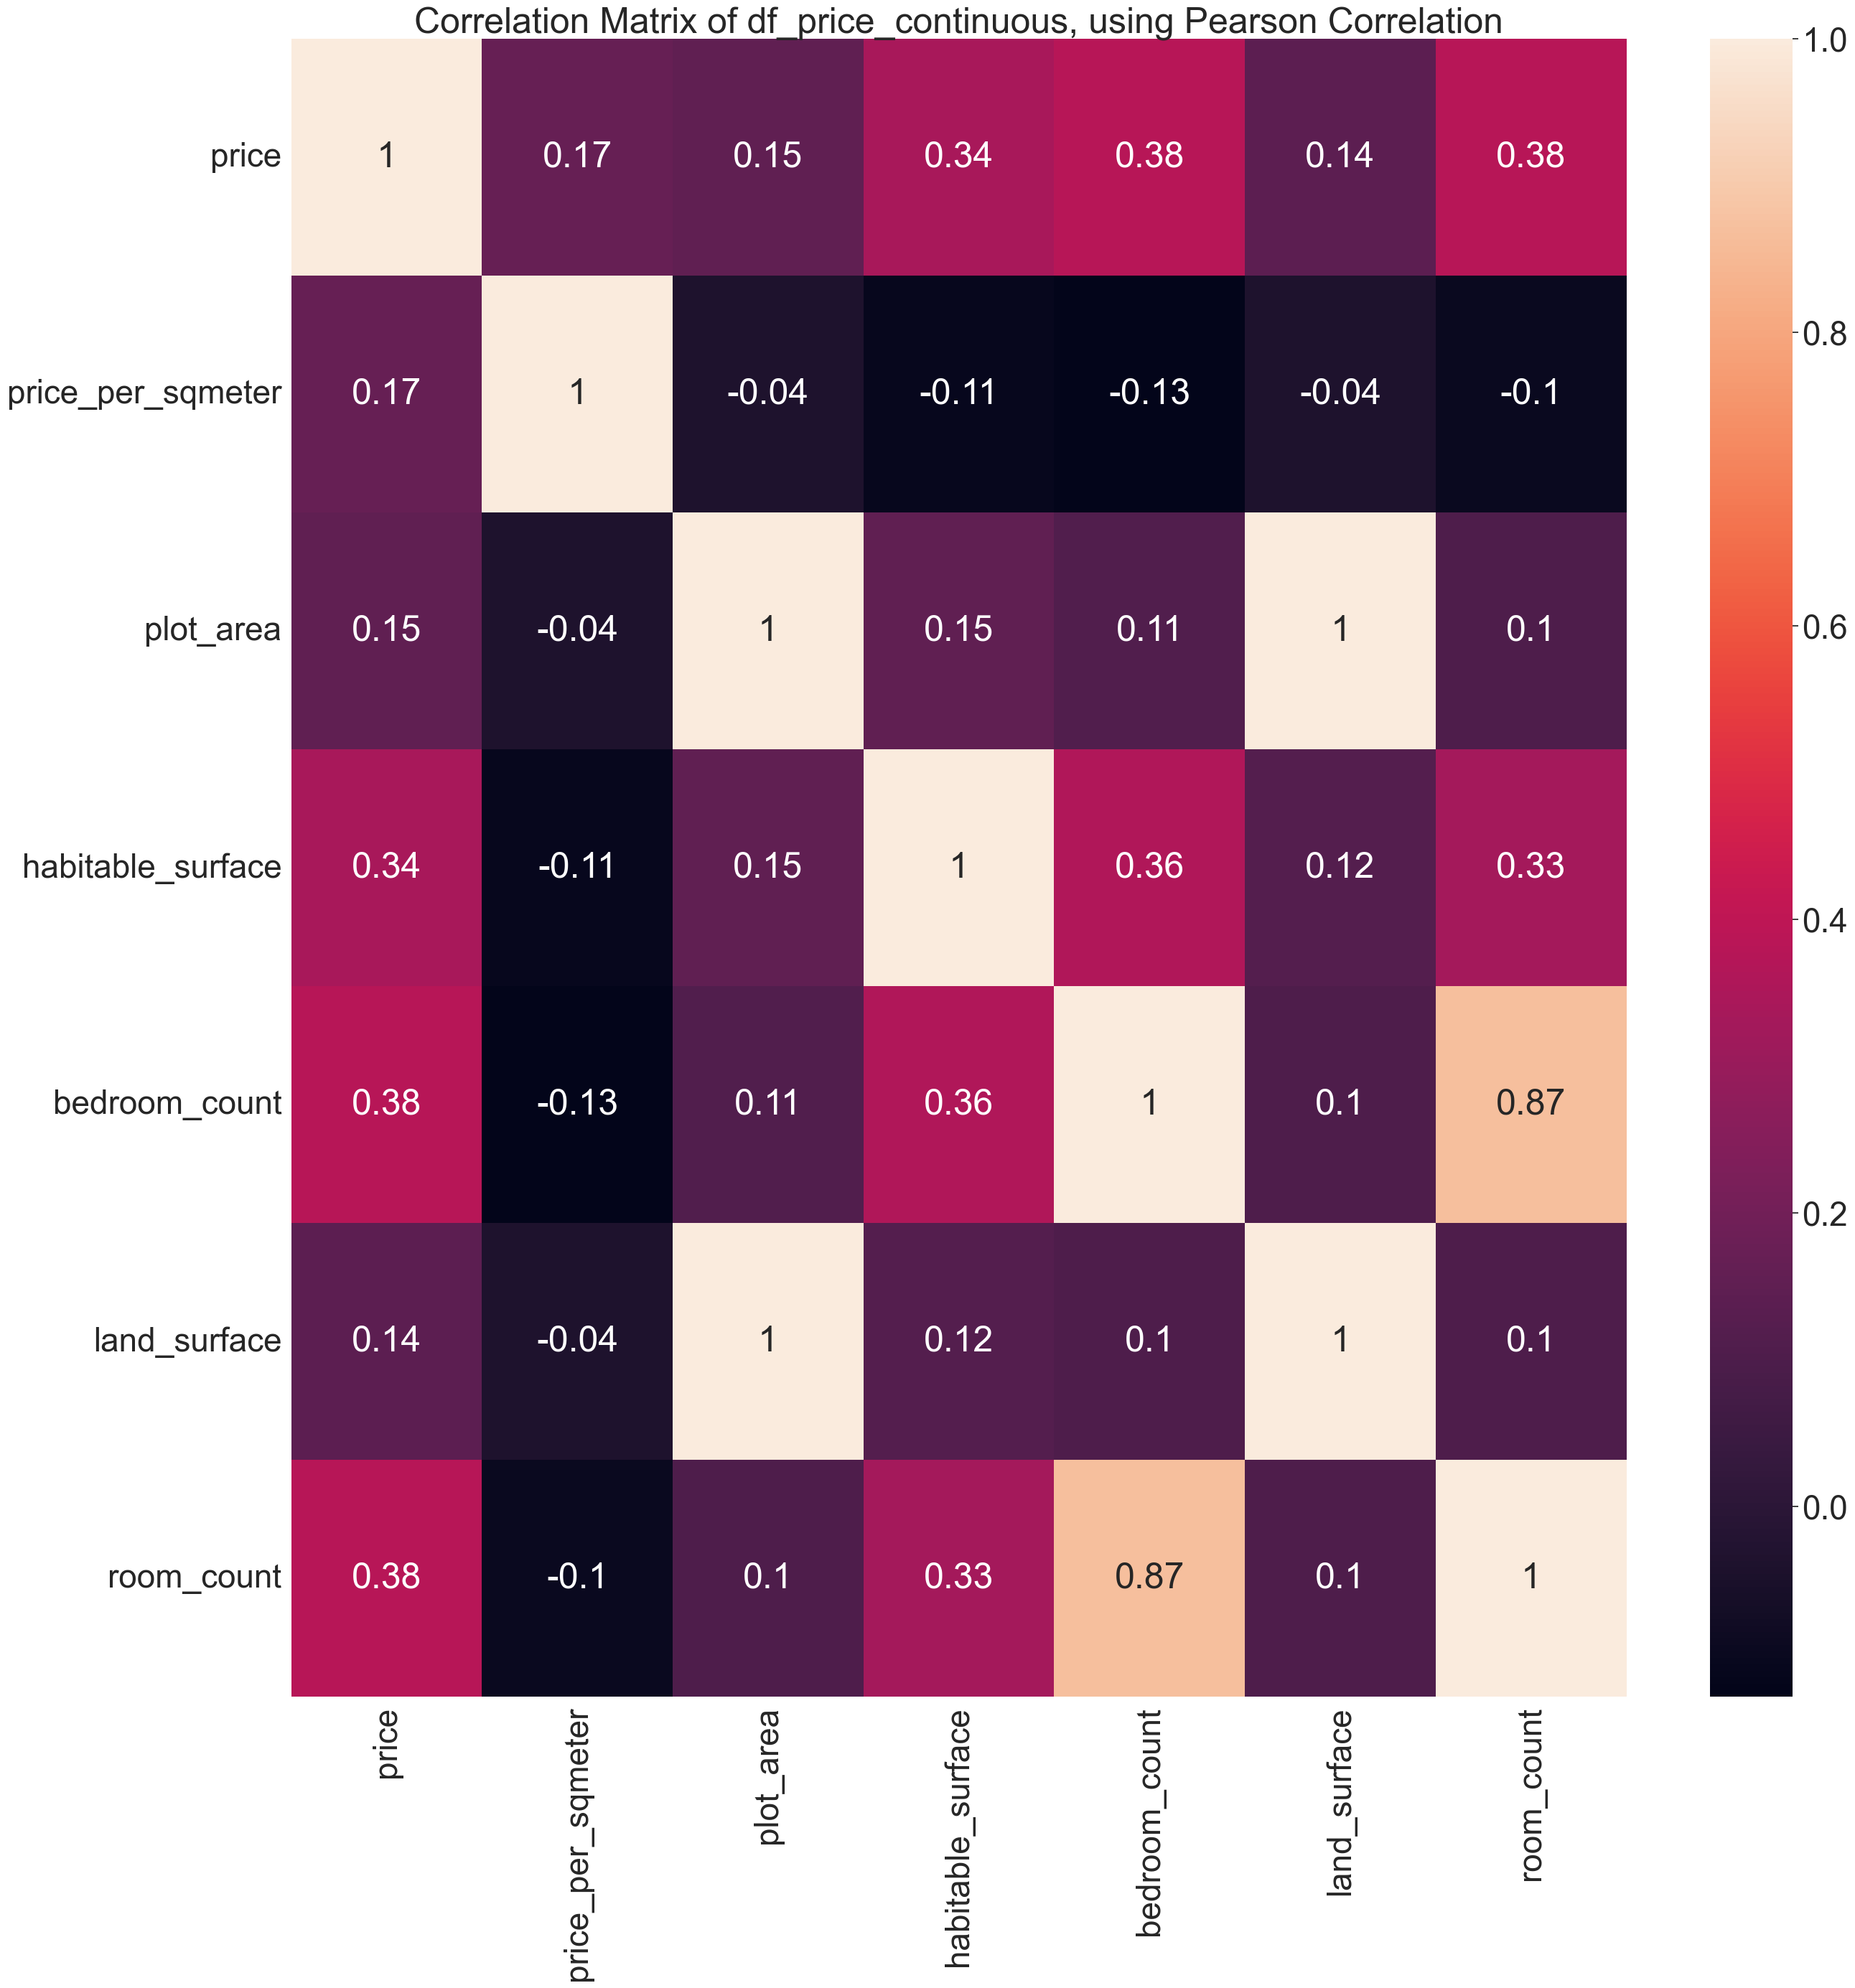

In [8]:
import os
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# filepath config
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

# loading ImmoConfig, PimpMyData
from src.config import ImmoConfig
from src.pimp_my_data import PimpMyData


# load data_forsale_new.csv into DataFrame
pimp_data = PimpMyData()
main_df = pimp_data.dataframe_generator("data", "data_forsale_new.csv")
main_df_columns = list(main_df.columns)

# check main_df
display(main_df.head())
display(main_df.shape)

# Initial search for missing values 
nan_status = pimp_data.give_nan_columns(main_df)
print(nan_status)

# Filling missing values 
main_df = pimp_data.fill_missing_values(main_df)

# Verification of missing value after first fill
nan_status = pimp_data.give_nan_columns(main_df)
print(nan_status)

# check duplicate
immocode_duplicates = len(main_df[main_df['immocode'].duplicated() == True])
print(f"There are {immocode_duplicates} duplicated item in main_df['immocode'] . So there is no literal duplicates in main_df")


# change dtypes of main_df for numerical variables
main_df = pimp_data.clean_dtypes_numerics(main_df)

# check main_df
main_df.info()

# split main_df
df_price_continuous = pimp_data.give_subset(main_df, ["price", "price_per_sqmeter", "plot_area", "habitable_surface", "bedroom_count", "land_surface", "room_count"])
df_categoricals = pimp_data.give_subset(main_df, ["type", "subtype", "epc_score", "immo_status", "postalcode", "district", "province", "region"])

# save df_price_continuous, df_categoricals
df_price_continuous.to_csv('../data/continuous.csv', index=False)
df_categoricals.to_csv("../data/categoricals.csv", index=False)


# summary statistics for continuous dfs:
pimp_data.present_data("price", "summarize", df_price_continuous)


# display distributions
sns.set_theme(style="whitegrid", palette="pastel")
sns.set(rc={"figure.figsize": (30, 30)})
sns.set(font_scale=3)
plt.title('Boxplot of several key variables')
sns.boxplot(data=df_price_continuous)
df_price_continuous.plot(kind='box', title='Boxplot of several key variables')
plt.xscale("log")
plt.yscale("log")
plt.show()

df_price_continuous.std()

# display correlation
continuous_corr = sns.heatmap(df_price_continuous.corr(method='pearson', min_periods=10).round(2), annot=True)
plt.title("Correlation Matrix of df_price_continuous, using Pearson Correlation")



### Based on the findings above, we can conclude about some thinngs 

1. The dataset represented by main_df is quite clean to begin with, although it was necessary to do a bit o cleaning by filling in the missing values
     - There 16170 observations with 18 variables (16170 rows, 18 columns)
     - Using Scrapy.ItemPipeline, I have managed to convert the string variables in **district**,  **province**,  and **region** using databases from [opendatasoft](https://public.opendatasoft.com/explore/dataset/georef-belgium-arrondissement/api/?disjunctive.arr_name_fr&disjunctive.arr_name_nl&disjunctive.arr_name_de&disjunctive.reg_name_de&disjunctive.reg_name_nl&disjunctive.reg_name_fr&disjunctive.prov_name_de&disjunctive.prov_name_nl&sort=year&rows=43) for district, province, and region codes. I attempted to substitute the municipality names with their respective codes using the database from [Esri BeLux Online Public Data](https://open-data-esri-belux-esribeluxdata.hub.arcgis.com/datasets/belgium-municipalities-1/explore). Due to the limited time, I cannot progress further with this endeavour.
2. main_df is splitted into 2 subsets based on the nature of the variables. 
     - df_price_continuous : a subset of main_df['price'] with plot_area, price_per_sqmeter,habitable_surface land_surface, bedroom_count, room_count
     - df_categoricals : a subset of categorcal variables such as immo_type, immo_subtype, immo_status, postcode, municipaity, district, region, province
3. In the case of df_price_continuous: here are some important variable combination to notice :
     - price >< room_count
     - price >< bedroom_count
     - price >< habitable_surface
4. The general pattern of distribution is quite spread--out and the outliers pull the distribution further